# Final Project - Open Restaurant Program in NYC

## Members: Jieying Cai, Yuhan Mei, Sizhu Wang

---

#### Import Join dataset and revised date dataset

In [18]:
library(dplyr)

In [2]:
rest_data <- read.csv("Join.csv")

In [3]:
date_data <- read.csv("Join_reviseddate.csv")

In [4]:
head(rest_data)

Seating.Interest..Sidewalk.Roadway.Both. CAMIS   
1 roadway                                  50109522
2 sidewalk                                 50113143
3 both                                     50069734
4 sidewalk                                 50097413
5 roadway                                  50047872
6 both                                     50104163
  Approved.for.Sidewalk.Seating Approved.for.Roadway.Seating
1 no                            yes                         
2 yes                           no                          
3 yes                           yes                         
4 yes                           no                          
5 no                            yes                         
6 yes                           yes                         
  Time.of.Submission     X  Score Grade BOROUGH  Violation.Code
1 04/22/2021 02:47:00 PM NA #N/A  #N/A  #N/A     #N/A          
2 08/17/2021 03:04:00 PM NA #N/A  #N/A  #N/A     #N/A          
3 08/15/2020 04:55:00 PM NA 11    A     Queens   02G           
4 08/15/2020 09:58:00 AM NA 7     A     Brooklyn 10F           
5 08/14/2020 05:08:00 PM NA #N/A  #N/A  #N/A     #N/A          
6 08/17/2020 10:29:00 AM NA #N/A  #N/A  #N/A     #N/A          
  Violation.Description                                                                                                                                                                                                                                                          
1 #N/A                                                                                                                                                                                                                                                                           
2 #N/A                                                                                                                                                                                                                                                                           
3 Cold food item held above 41¬∫ F (smoked fish and reduced oxygen packaged foods above 38 ¬∫F) except during necessary preparation.                                                                                                                                             
4 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
5 #N/A                                                                                                                                                                                                                                                                           
6 #N/A                                                                                                                                                                                                                                                                           
  Cuisin          
1 #N/A            
2 #N/A            
3 Indian          
4 Hotdogs/Pretzels
5 #N/A            
6 #N/A

---

#### City-level responsiveness analysis

#### Using month( ) & year( ) function from lubridate package create year and month columns

In [19]:
library(lubridate)

In [6]:
date_data$year <- year(date_data$Time.of.Submission)

In [7]:
date_data$month <- month(date_data$Time.of.Submission)

In [8]:
head(date_data,5)

Seating.Interest..Sidewalk.Roadway.Both. CAMIS   
1 roadway                                  50109522
2 sidewalk                                 50113143
3 both                                     50069734
4 sidewalk                                 50097413
5 roadway                                  50047872
  Approved.for.Sidewalk.Seating Approved.for.Roadway.Seating Time.of.Submission
1 no                            yes                          2021/4/22         
2 yes                           no                           2021/8/17         
3 yes                           yes                          2020/8/15         
4 yes                           no                           2020/8/15         
5 no                            yes                          2020/8/14         
  X  X.1 Score Grade BOROUGH  Violation.Code
1 NA NA  #N/A  #N/A  #N/A     #N/A          
2 NA NA  #N/A  #N/A  #N/A     #N/A          
3 NA NA  11    A     Queens   02G           
4 NA NA  7     A     Brooklyn 10F           
5 NA NA  #N/A  #N/A  #N/A     #N/A          
  Violation.Description                                                                                                                                                                                                                                                          
1 #N/A                                                                                                                                                                                                                                                                           
2 #N/A                                                                                                                                                                                                                                                                           
3 Cold food item held above 41¬∫ F (smoked fish and reduced oxygen packaged foods above 38 ¬∫F) except during necessary preparation.                                                                                                                                             
4 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
5 #N/A                                                                                                                                                                                                                                                                           
  Cuisin           year month
1 #N/A             2021 4    
2 #N/A             2021 8    
3 Indian           2020 8    
4 Hotdogs/Pretzels 2020 8    
5 #N/A             2020 8

Filter by year

In [9]:
year_df <- date_data %>%
    group_by(year) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(year_df)

year counts
1 2020 11603 
2 2021  1367

#### Filter Restaurants which applied in 2020 by month

In [10]:
yearone_df <- date_data %>% 
    filter(year == "2020") 

In [41]:
yearone_month_df <- yearone_df %>%
    group_by(month) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

print(yearone_month_df)

# A tibble: 7 × 2
  month counts
  <dbl>  <int>
1     6   6607
2     7   3004
3     8   1080
4     9    423
5    10    264
6    11    120
7    12    105


---

#### City-level health condition analysis

#### filter by grade, violation code

In [40]:
grade_df <- rest_data %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(grade_df)

Grade counts
1 A     9185  
2 #N/A  2396  
3 B     1045  
4 C      344

In [16]:
violation_code_df <- rest_data %>%
    group_by(Violation.Code) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(violation_code_df)

Violation.Code counts
1 #N/A           2396  
2 10F            2049  
3 06D             996  
4 08A             990  
5 06C             835  
6 10B             680

---

#### City-level cuisine analysis

In [57]:
cuisin_df <- rest_data %>%
    group_by(Cuisin) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

cuisin_df

Cuisin                         counts
1  American                       2535  
2  #N/A                           2396  
3  Italian                         823  
4  Coffee/Tea                      631  
5  Mexican                         560  
6  Latin American                  552  
7  Japanese                        466  
8  Pizza                           461  
9  Chinese                         368  
10 Spanish                         356  
11 French                          245  
12 Thai                            233  
13 Asian/Asian Fusion              229  
14 Korean                          191  
15 Mediterranean                   178  
16 Bakery Products/Desserts        176  
17 Caribbean                       160  
18 Irish                           154  
19 Indian                          147  
20 Tex-Mex                         130  
21 Seafood                         117  
22 Greek                           108  
23 Hamburgers                      106  
24 Jewish/Kosher                   105  
25 Middle Eastern                  105  
26 Sandwiches                      100  
27 Steakhouse                       83  
28 Vegetarian                       73  
29 Juice, Smoothies, Fruit Salads   66  
30 Peruvian                         66  
⋮  ⋮                              ⋮     
53 Hawaiian                       16    
54 Polish                         16    
55 Soul Food                      16    
56 Pancakes/Waffles               15    
57 English                        14    
58 Ethiopian                      14    
59 Continental                    13    
60 Pakistani                      13    
61 Chinese/Japanese                9    
62 Moroccan                        8    
63 Portuguese                      8    
64 Nuts/Confectionary              7    
65 Indonesian                      6    
66 Not Listed/Not Applicable       6    
67 Californian                     5    
68 Creole/Cajun                    5    
69 Egyptian                        5    
70 Afghan                          4    
71 Cajun                           4    
72 Chinese/Cuban                   4    
73 Scandinavian                    4    
74 Soups                           4    
75 Creole                          3    
76 Hotdogs                         3    
77 New American                    3    
78 Southwestern                    3    
79 Hotdogs/Pretzels                2    
80 Chilean                         1    
81 Czech                           1    
82 Iranian                         1

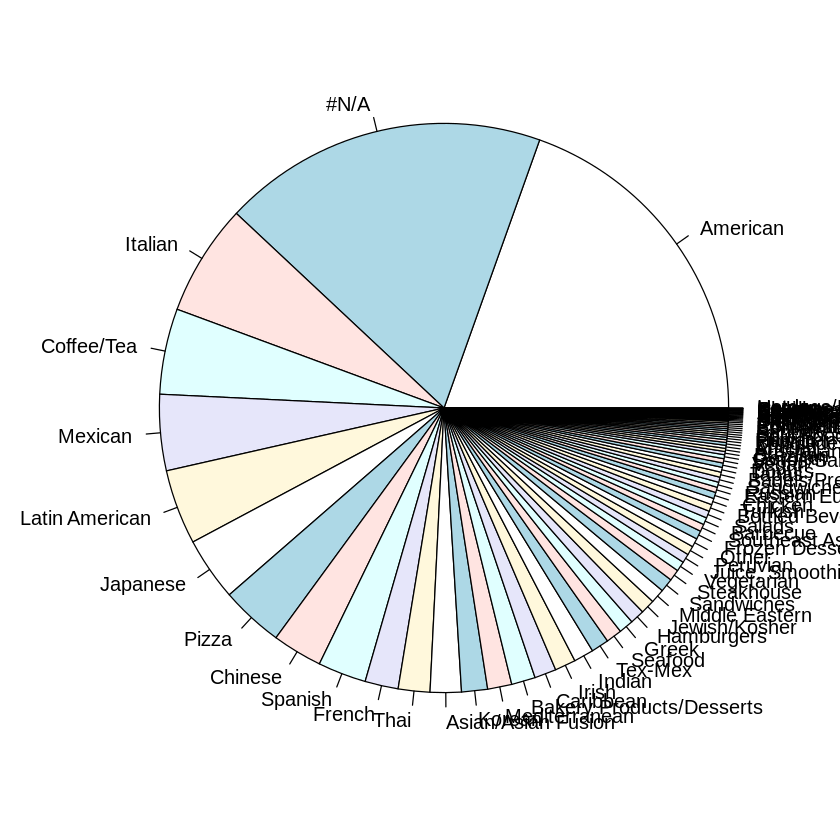

In [56]:
library(ggplot2)
pie(cuisin_df$counts, labels = cuisin_df$Cuisin, radius = 1)

In [60]:
xtab1 <- table(rest_data$Cuisin, rest_data$Grade)

print(xtab1)

                                
                                 #N/A    A    B    C
  #N/A                           2396    0    0    0
  Afghan                            0    4    0    0
  African                           0   12    7    2
  American                          0 2268  209   58
  Asian/Asian Fusion                0  174   45   10
  Australian                        0   17    4    1
  Bagels/Pretzels                   0   33    3    1
  Bakery Products/Desserts          0  154   12   10
  Bangladeshi                       0   13    5    2
  Barbecue                          0   44    5    3
  Bottled Beverages                 0   50    1    0
  Brazilian                         0   20    3    0
  Cajun                             0    4    0    0
  Californian                       0    5    0    0
  Caribbean                         0  122   21   17
  Chicken                           0   42    3    1
  Chilean                           0    1    0    0
  Chinese    

In [61]:
test1 <- chisq.test(rest_data$Cuisin, rest_data$Grade)

print(test1)

Warning message in chisq.test(rest_data$Cuisin, rest_data$Grade):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  rest_data$Cuisin and rest_data$Grade
X-squared = 13446, df = 243, p-value < 2.2e-16



---

#### Borough distribution of restaurants

In [67]:
borough_df <- rest_data %>%
    group_by(BOROUGH) %>%
    summarise(        
        counts = n()
    ) %>%
 arrange(desc(counts))

head(borough_df)

BOROUGH       counts
1 Manhattan     5223  
2 Brooklyn      2504  
3 #N/A          2396  
4 Queens        2104  
5 Bronx          588  
6 Staten Island  153

---

#### Create tables of restaurant inspection grades in different boroughs

#### 1. Manhattan

In [68]:
Manhattan_df <- rest_data %>% 
    filter(BOROUGH == "Manhattan") 

In [69]:
Manhattan_grade_df <- Manhattan_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Manhattan_grade_df)

Grade counts
1 A     4597  
2 B      486  
3 C      140

#### 2. Brooklyn

In [70]:
Brooklyn_df <- rest_data %>% 
    filter(BOROUGH == "Brooklyn")

In [71]:
Brooklyn_grade_df <- Brooklyn_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Brooklyn_grade_df)

Grade counts
1 A     2183  
2 B      246  
3 C       75

#### 3. Queens

In [72]:
Queens_df <- rest_data %>% 
    filter(BOROUGH == "Queens")

In [73]:
Queens_grade_df <- Queens_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Queens_grade_df)

Grade counts
1 A     1796  
2 B      215  
3 C       93

#### 4. Bronx

In [74]:
Bronx_df <- rest_data %>% 
    filter(BOROUGH == "Bronx")

In [75]:
Bronx_grade_df <- Bronx_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Bronx_grade_df)

Grade counts
1 A     471   
2 B      86   
3 C      31

#### 5. Staten Island

In [76]:
Staten_Island_df <- rest_data %>% 
    filter(BOROUGH == "Staten Island")

In [77]:
Staten_Island_grade_df <- Staten_Island_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Staten_Island_grade_df)

Grade counts
1 A     137   
2 B      12   
3 C       4

In [64]:
xtab2 <- table(rest_data$BOROUGH, rest_data$Grade)

print(xtab2)

               
                #N/A    A    B    C
  #N/A          2396    0    0    0
  0                0    1    0    1
  Bronx            0  471   86   31
  Brooklyn         0 2183  246   75
  Manhattan        0 4597  486  140
  Queens           0 1796  215   93
  Staten Island    0  137   12    4


In [65]:
test2 <- chisq.test(rest_data$BOROUGH, rest_data$Grade)

print(test2)

Warning message in chisq.test(rest_data$BOROUGH, rest_data$Grade):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  rest_data$BOROUGH and rest_data$Grade
X-squared = 13040, df = 18, p-value < 2.2e-16

